# GeoPy para identificar coordenadas a partir de location

## Objetivo

* Implementar Geopy en forma reversa de como estábamos usando las coordenadas. Esta vez, de Location a coordenadas con geocode para ver si da resultados más exactos.
* Función para limpiar Longitude y Latitude.

## Importar librerías

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re # Para limpiar coordenadas https://docs.python.org/es/3/library/re.html
# re: Operaciones con expresiones regulares
# Este módulo proporciona operaciones de coincidencia de expresiones regulares similares a las encontradas en Perl.
'''
Tanto los patrones como las cadenas de texto a buscar pueden ser cadenas de Unicode (str) así como cadenas de 8 bits (bytes).
Sin embargo, las cadenas Unicode y las cadenas de 8 bits no se pueden mezclar: es decir,
no se puede hacer coincidir una cadena Unicode con un patrón de bytes o viceversa; del mismo modo, al pedir una sustitución,
la cadena de sustitución debe ser del mismo tipo que el patrón y la cadena de búsqueda.
'''

from geopy.geocoders import ArcGIS
from geopy.geocoders import Nominatim
# geopy-python: librería para geocoding
# geocoders: lo mismo que geopy
# ArcGIS:Api para visualización GIS y análisis

Usando dataset ../../Data/02ParaLimpiar/02desastres_paralimpiar.csv

## Cargar datos

In [174]:
df = pd.read_csv('../../Data/02ParaLimpiar/02desastres_paralimpiar.csv', encoding='utf-8', delimiter=';', engine='python')

## Verificar carga de dataset

##  Resumen básico shape, info, head

In [175]:
df.shape
# Resultado: 16636 filas y 20 columnas)

(16636, 26)

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16636 entries, 0 to 16635
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dis No             16636 non-null  object 
 1   Year               16636 non-null  int64  
 2   Seq                16636 non-null  int64  
 3   Disaster Subgroup  16636 non-null  object 
 4   Disaster Type      16636 non-null  object 
 5   Disaster Subtype   13313 non-null  object 
 6   Country            16636 non-null  object 
 7   ISO                16636 non-null  object 
 8   Region             16636 non-null  object 
 9   Continent          16636 non-null  object 
 10  Location           14825 non-null  object 
 11  Origin             4085 non-null   object 
 12  Associated Dis     3593 non-null   object 
 13  Dis Mag Value      5064 non-null   float64
 14  Dis Mag Scale      15416 non-null  object 
 15  Latitude           2775 non-null   object 
 16  Longitude          277

In [177]:
df.head(1)

Dis No  Year   Seq Disaster Subgroup Disaster Type Disaster Subtype  \
0  1900-9002-CPV  1900  9002    Climatological       Drought          Drought   

      Country  ISO          Region Continent  ... Longitude Start Year  \
0  Cabo Verde  CPV  Western Africa    Africa  ...       NaN       1900   

  Start Month  Start Day End Year End Month End Day  Total Deaths  \
0         NaN        NaN     1900       NaN     NaN       11000.0   

   Total Affected  Total Damages Adj  
0             NaN                NaN  

[1 rows x 26 columns]

# Filtros para Location y geolocalización

In [178]:
# Categorías geográficas
geographical_data = df[['Location', 'ISO', 'Country', 'Region', 'Continent']]

# Categorías de magnitud
magnitude_data = df[['Dis Mag Scale', 'Dis Mag Value']]

# Categorías de geolocalización
geolocation_data = df[['Latitude', 'Longitude']]

# Categorías de fecha de Earthquake
datetime_data = df[['Start Day', 'Start Month', 'Start Year', 'End Day', 'End Month', 'End Year']]

# GeoPy

## Crear objeto de ArcGIS

In [179]:
nom=ArcGIS()

# Location a coordenadas

### Función get_geocode

Función para extraer la información de geolocalización para cada ubicación en su conjunto de datos.

In [180]:
def get_geocode(location):
    geolocator = Nominatim(user_agent = "MozillaFirefox", timeout=1)
    geocode = geolocator.geocode(location)
    
    if geocode is None:
        return None
    
    latitude = geocode.latitude
    longitude = geocode.longitude
    return latitude, longitude

In [181]:
# df['Geocode'] = df['Location'].apply(get_geocode)

### Error: GeoCoderUnavailable

Error:
GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Central%2C+North-West%2C+North-East%2C+West+regions&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

Indica que se agotó el tiempo de espera de la conexión al servicio de geocodificación de Nominatim, lo que impide que la solicitud de geocodificación se complete correctamente.

Este error puede ocurrir debido a varias razones, como problemas de conectividad de red o alta carga del servidor. Aquí hay algunos pasos que puede seguir para solucionar el problema:

* Vuelva a intentar la solicitud: a veces, el tiempo de espera puede ser un problema temporal. Puede intentar ejecutar el código nuevamente para ver si tiene éxito. Si se trata de un problema de red temporal, el intento posterior podría funcionar.

* Verifique su conexión a Internet: asegúrese de que su conexión a Internet sea estable y no experimente interrupciones. Puede intentar acceder a otros sitios web o servicios para verificar su conectividad.

* Verifique el estado del servicio de Nominatim: visite el sitio web de Nominatim o busque "Estado del servicio de Nominatim" en línea para verificar si hay interrupciones conocidas del servicio o actividades de mantenimiento que podrían estar causando el error de tiempo de espera. Si hay algún problema informado, es posible que deba esperar hasta que se resuelva.

* Aumente el valor de tiempo de espera: puede intentar aumentar el valor de tiempo de espera en su código para que la conexión tenga más tiempo para establecerse. Por ejemplo, puede establecer el parámetro de tiempo de espera del geolocalizador de Nominatim en un valor más alto, como timeout=5 (5 segundos). Ajuste el valor del tiempo de espera según sus necesidades específicas.

En caso de que funcionara, la columna "Geocode" contendrá tuplas con valores de latitud y longitud para cada ubicación. Si no se encuentra el código geográfico para una ubicación, contendrá None.

Si sigue dando problemas, limpiar manualmente los caracteres raros o eliminarlos.

# Limpiar coordenadas

## Función para limpiar coordenadas

IMPORTANTE: Leer comentario arriba de cada código. Dependiendo de si se usa uno u otro, se obtiene mapa scatterplot o no

In [182]:
# # Versión para capturar valores anómalos...
# # No funciona el mapa de scatterplot si se aplica este

# # Convertir 'Latitude' y 'Longitude' a string
# df['Latitude'] = df['Latitude'].astype(str)
# df['Longitude'] = df['Longitude'].astype(str)

# # Aplicar valores negativos donde Latitude y Longitude contengan 'S' o 'W'
# df.loc[df['Latitude'].str.contains('S'), 'Latitude'] = '-' + df['Latitude']
# df.loc[df['Longitude'].str.contains('W'), 'Longitude'] = '-' + df['Longitude']

# # Limpiar coordenadas latitude y longitude
# df['Latitude'] = df['Latitude'].apply(lambda x: re.sub('[^\d.-]', '', x.split('.', 1)[0]) if isinstance(x, str) else x)
# df['Longitude'] = df['Longitude'].apply(lambda x: re.sub('[^\d.-]', '', x.split('.', 1)[0]) if isinstance(x, str) else x)

# # Cambiar strings vacíos a NaN
# df['Latitude'] = df['Latitude'].replace('', np.nan)
# df['Longitude'] = df['Longitude'].replace('', np.nan)

# # Convertir coordenadas válidas a float
# df['Latitude'] = df['Latitude'].astype(float)
# df['Longitude'] = df['Longitude'].astype(float)

# # Identificar valores anómalos basados en grados
# anomalous_lat = df['Latitude'].abs() > 90
# anomalous_lon = df['Longitude'].abs() > 180

# # Capturar los valores anómalos de latitude y longitude values como listas
# anomalous_lat_values = df.loc[anomalous_lat, 'Latitude'].tolist()
# anomalous_lon_values = df.loc[anomalous_lon, 'Longitude'].tolist()

# print("Valores Anómalos de Latitude:", anomalous_lat_values)
# print("Valores Anómalos de Longitude:", anomalous_lon_values)


In [214]:
# Versión sin capturar valores anómalos...
# Sí funciona el mapa de scatterplot si se aplica este

# Convertir 'Latitude' y 'Longitude' a string
df['Latitude'] = df['Latitude'].astype(str)
df['Longitude'] = df['Longitude'].astype(str)

# Aplicar valores negativos donde Latitude y Longitude contengan S o W
# df.loc[df['Latitude'].str.contains('S'), 'Latitude'] *= -1
# df.loc[df['Longitude'].str.contains('W'), 'Longitude'] *= -1

# Aplicar valores negativos donde Latitude y Longitude contengan 'S' o 'W'
df.loc[df['Latitude'].str.contains('S'), 'Latitude'] = '-' + df['Latitude']
df.loc[df['Longitude'].str.contains('W'), 'Longitude'] = '-' + df['Longitude']

# Limpiar las coordenadas latitude y longitude
df['Latitude'] = df['Latitude'].apply(lambda x: re.sub('[^\d.-]', '', x.split('.', 1)[0]) if isinstance(x, str) else x)
df['Longitude'] = df['Longitude'].apply(lambda x: re.sub('[^\d.-]', '', x.split('.', 1)[0]) if isinstance(x, str) else x)

# Eliminar puntos finales
df['Latitude'] = df['Latitude'].str.rstrip('.')
df['Longitude'] = df['Longitude'].str.rstrip('.')

# Cambiar strings vacíos a NaN
df['Latitude'] = df['Latitude'].replace('', np.nan)
df['Longitude'] = df['Longitude'].replace('', np.nan)

# Convertir coordenadas válidas a float
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)

# Identificar valores anómalos a partir de los grados
anomalous_lat = df['Latitude'].abs() > 90
anomalous_lon = df['Longitude'].abs() > 180

# Configurar valores anómalos a NaN
# Scatterplot de mapa solo funciona si esto está activado
df.loc[anomalous_lat, 'Latitude'] = np.nan
df.loc[anomalous_lon, 'Longitude'] = np.nan

La función re.sub() se usa para eliminar caracteres que no son dígitos de las coordenadas.
'[^\d.-]' es un patrón de expresión regular que coincide con cualquier carácter que no sea un dígito, un punto (punto decimal) o un guión (signo negativo).
x.split('.', 1)[0] divide la cadena en la primera aparición del punto decimal y conserva solo la parte anterior. Esto garantiza que solo se conserve la parte válida del valor de la coordenada.
La función str.rstrip('.') se utiliza para eliminar los puntos finales de las coordenadas.

### Explicación del fragmento de código para identificar valores anómalos de latitud y longitud en el DataFrame.

#### anomalous_lat = df['Latitud'].abs() > 90:

* df['Latitude'].abs() devuelve los valores absolutos de la columna 'Latitude'.
* > 90 comprueba si los valores de latitud absoluta son superiores a 90.
Esta expresión crea una serie booleana (anomalous_lat) donde True indica que la latitud es anómala (fuera del rango válido de -90 a 90 grados).

#### anomalous_lon = df['Longitud'].abs() > 180:

df['Longitud'].abs() devuelve los valores absolutos de la columna 'Longitud'.
> 180 comprueba si los valores de longitud absoluta son superiores a 180.
Esta expresión crea una serie booleana (anomalous_lon) donde True indica que la longitud es anómala (fuera del rango válido de -180 a 180 grados).
Las series booleanas anómalas_lat y anómalas_lon resultantes tendrán valores verdaderos para las filas donde los valores de latitud o longitud están fuera del rango válido, y falsos para las filas con coordenadas válidas.

Se pueden usar estas series booleanas para filtrar o manejar las filas con coordenadas anómalas en su marco de datos. Por ejemplo, se pueden eliminar las filas con coordenadas anómalas utilizando el siguiente código:

df_cleaned_coords = df[~(anomalous_lat | anomalous_lon)]

El operador ~ niega la serie booleana, por lo que ~(anomalous_lat | anomalou_lon) selecciona filas donde ni la latitud ni la longitud son anómalas. El DataFrame resultante, df_cleaned_coords, contendrá solo las filas con coordenadas válidas.

In [184]:
# anomalous_lat = []
# anomalous_lon = []

# for lat in df['Latitude']:
#     if not (-90 <= lat <= 90) or '.' in str(lat):
#         if not pd.isnull(lat):
#             anomalous_lat.append(lat)

# for lon in df['Longitude']:
#     if not (-180 <= lon <= 180) or '.' in str(lon):
#         if not pd.isnull(lon):
#             anomalous_lon.append(lon)

# print("Valores Anómalos de Latitude:", anomalous_lat)
# print("Valores Anómalos de Longitude:", anomalous_lon)

## Tests de verificación de limpieza de coordenadas

In [185]:
print(df['Latitude'])
print(df['Longitude'])

0         NaN
1         NaN
2        14.0
3         NaN
4         NaN
         ... 
16631     NaN
16632     NaN
16633     NaN
16634     NaN
16635     NaN
Name: Latitude, Length: 16636, dtype: float64
0         NaN
1         NaN
2       -91.0
3         NaN
4         NaN
         ... 
16631     NaN
16632     NaN
16633     NaN
16634     NaN
16635     NaN
Name: Longitude, Length: 16636, dtype: float64


In [186]:
print(df.head())

          Dis No  Year   Seq Disaster Subgroup      Disaster Type  \
0  1900-9002-CPV  1900  9002    Climatological            Drought   
1  1900-9001-IND  1900  9001    Climatological            Drought   
2  1902-0012-GTM  1902    12       Geophysical         Earthquake   
3  1902-0003-GTM  1902     3       Geophysical  Volcanic activity   
4  1902-0010-GTM  1902    10       Geophysical  Volcanic activity   

  Disaster Subtype     Country  ISO           Region Continent  ... Longitude  \
0          Drought  Cabo Verde  CPV   Western Africa    Africa  ...       NaN   
1          Drought       India  IND    Southern Asia      Asia  ...       NaN   
2  Ground movement   Guatemala  GTM  Central America  Americas  ...     -91.0   
3         Ash fall   Guatemala  GTM  Central America  Americas  ...       NaN   
4         Ash fall   Guatemala  GTM  Central America  Americas  ...       NaN   

  Start Year Start Month  Start Day End Year  End Month  End Day  \
0       1900         NaN      

In [187]:
print(df.dtypes)

Dis No                object
Year                   int64
Seq                    int64
Disaster Subgroup     object
Disaster Type         object
Disaster Subtype      object
Country               object
ISO                   object
Region                object
Continent             object
Location              object
Origin                object
Associated Dis        object
Dis Mag Value        float64
Dis Mag Scale         object
Latitude             float64
Longitude            float64
Start Year             int64
Start Month          float64
Start Day            float64
End Year               int64
End Month            float64
End Day              float64
Total Deaths         float64
Total Affected       float64
Total Damages Adj    float64
dtype: object


In [188]:
print(df['Latitude'].unique())
print(df['Longitude'].unique())

[  nan   14.   32.   33.    1.   38.   44.    9.   36.   -3.   28.   -7.
   23.  -28.   31.   -1.   25.   30.   -0.   37.   48.  -35.   -8.    6.
    3.  -36.    5.  -31.  -26.   19.   35.  -38.  -54.    7.   18.  -37.
   34.  -22.   39.   -9.   10.   40.   -2.  -32.  -25.   41.    2.   43.
   17.   22.   11.   24.   -4.   21.   15.  -11.   45.  -14.   42.    8.
  -41.   13.  -39.   29.  -10.   53.   47.  -13.   52.   27.   16.  -16.
  -15.   60.   12.   -5.   -6.  -12.   66.   46.  -33.    4.   50.  -19.
   26.  -45.   51.  -21.  -18.   20.  -23.  -30.  -17.   64.   63.  383.
  357.  -72.   49.   67.   54.  -24.   58.   62.  -27.  -42.  -20.  -44.
  -29.  -34.  411.  564. -865.  270.  350.  -40.   78.  -68.  322.  -43.
  388.  151.  940.  193. -295. -405.  125.   87.  289.  213.   55.  334.
  420.  194.  301.  342.  370. -104.  465. -528.  398.  191.  236. -189.
  282.  227.  369. -344.  445.  304.  359.  258.  229.  491.  532.  146.
 -617.  448. -133.  439.  431.  165.  822. -140.  2

In [189]:
len(df['Latitude'])
len(df['Longitude'])

16636

In [190]:
# Examinar filas específicas para verificar si el proceso de limpieza ha manejado los valores anómalos correctamente.
print(df.loc[68, 'Latitude'])
print(df.loc[68, 'Longitude'])

31.0
100.0


### Valores faltantes

In [191]:
df[['Longitude', 'Latitude']].isnull().sum()

Longitude    13861
Latitude     13861
dtype: int64

In [192]:
df[['Longitude', 'Latitude']].isna().sum()

Longitude    13861
Latitude     13861
dtype: int64

## Test de verificación de valores anómalos

In [193]:
anomalous_lat.value_counts()

False    16475
True       161
Name: Latitude, dtype: int64

In [194]:
len(anomalous_lat)

16636

In [195]:
anomalous_lon.value_counts()

False    16605
True        31
Name: Longitude, dtype: int64

In [196]:
len(anomalous_lon)

16636

### Índices anómalos de latitude

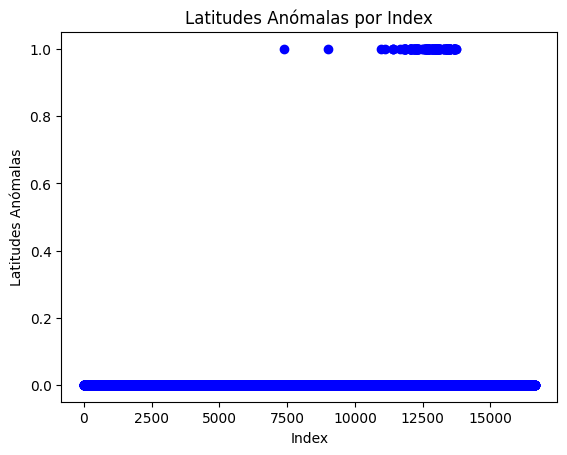

In [209]:
anomalous_lat

# Crear lista de valores de index
anomalous_lat_indx = list(range(len(anomalous_lat)))

# Plot the indexes
plt.plot(anomalous_lat_indx, anomalous_lat, 'bo')
plt.xlabel('Index')
plt.ylabel('Latitudes Anómalas')
plt.title('Latitudes Anómalas por Index')
plt.show()


### Índices anómalos de longitude

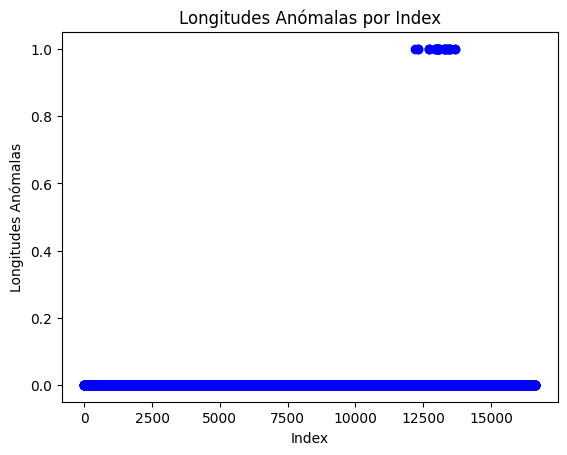

In [210]:
anomalous_lon

# Crear lista de valores de index
anomalous_lon_indx = list(range(len(anomalous_lon)))

# Plot the indexes
plt.plot(anomalous_lon_indx, anomalous_lon, 'bo')
plt.xlabel('Index')
plt.ylabel('Longitudes Anómalas')
plt.title('Longitudes Anómalas por Index')
plt.show()

# Visualizaciones para comprobar coordenadas

## Boxplot para identificar outliers de Latitude y Longitude

<img src="../../Documentacion/CoordenadasLatitudesLongitudes.webp">

<Axes: >

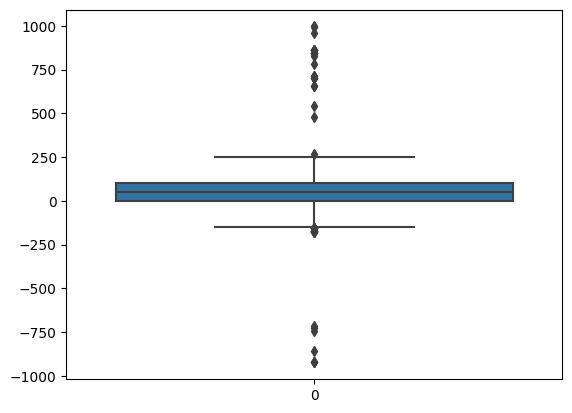

In [211]:
sns.boxplot(df['Longitude'])

La mayor concentración de desastres naturales a partir de Longitude se ubica entre los 10º y 100º, afectando a países de África y Eurasia.
Los outliers para Longitude se concentran entre los -125º y los -180º, es decir, Pacífico Occidental.

<Axes: >

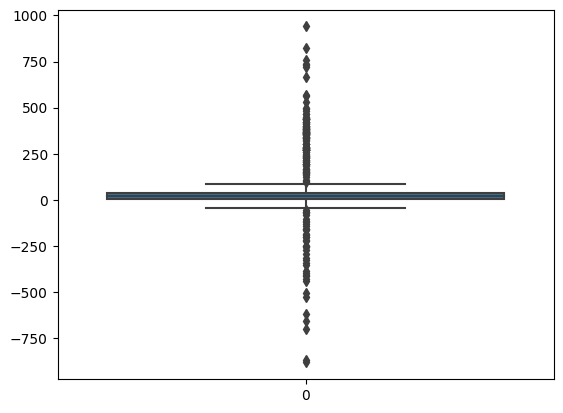

In [212]:
sns.boxplot(df['Latitude'])

La mayor concentración de desastres naturales se ubica entre los 0º y 35º por encima del Ecuador.
Los outliers para Latitude se concentran entre los -45º y los -90º, es decir, una parte del Cono Sur Americano y el Polo Sur, indicando que es zona de menos desastres naturales.

## Scatterplot

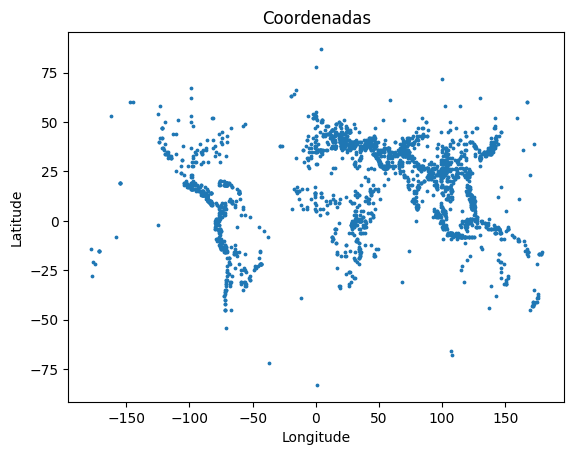

In [215]:
plt.scatter(df['Longitude'], df['Latitude'], s=3)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Coordenadas')
plt.show()

# Coropleth map

## Importar geopandas, shapely.geometry y plotly

In [202]:
import geopandas as gpd
from shapely.geometry import Point
from plotly.subplots import make_subplots
import plotly.graph_objects as go

### Crear un GeoDataFrame a partir del DataFrame

In [203]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

### Crear un geojson

In [204]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

### Guardar geojson

In [205]:
gdf.to_file('coordenadas.geojson', driver='GeoJSON')

### Cargar el geojson

In [206]:
gdf = gpd.read_file('coordenadas.geojson')

### Mapa de coropletas para Magnitud

In [207]:
# Combinar 'Disaster Mag Scale' and 'Disaster Mag Value' en una columna compuesta
df['Magnitude'] = df['Dis Mag Scale'] + ' ' + df['Dis Mag Value'].astype(str)

# Crear GeoDataFrame
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Crear el choropleth usando la columna compuesta 'Magnitude'
fig = make_subplots(specs=[[{"type": "choropleth"}]])
fig.add_trace(
    go.Choroplethmapbox(
        geojson=gdf.geometry.__geo_interface__,
        locations=gdf.index,
        z=gdf['Magnitude'],
        colorscale='Viridis',
        marker_opacity=0.7,
        marker_line_width=0,
        featureidkey='properties.index',  # Especificar la característica id key
        colorbar=dict(title='Magnitude')  # Especificar el título de colorbar
    )
)
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_zoom=2,
    mapbox_center={"lat": 0, "lon": 0}
)
fig.show()

Da error de traceback call y tarda demasiado.

### Mapa de coropletas para Disaster Subtype

In [208]:
# Crear GeoDataFrame
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Crear el choropleth usando la columna compuesta 'Magnitude'
fig = make_subplots(specs=[[{"type": "choropleth"}]])
fig.add_trace(
    go.Choroplethmapbox(
        geojson=gdf.geometry.__geo_interface__,
        locations=gdf.index,
        z=gdf['Disaster Subtype'],
        colorscale='Viridis',
        marker_opacity=0.7,
        marker_line_width=0,
        featureidkey='properties.index',  # Especificar la característica id key
        colorbar=dict(title='Magnitude')  # Especificar el título de colorbar
    )
)
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_zoom=2,
    mapbox_center={"lat": 0, "lon": 0}
)
fig.show()